## (1) ROOT with numpy

In [1]:
import ROOT
import numpy as np
from math import sqrt

Welcome to JupyROOT 6.24/00


In [2]:
c1 = ROOT.TCanvas("c1","c1",600,600)

In [3]:
y=np.array([4.708/5.,9.498/10.,19.01/20.,28.53/30.,47.74/50.,66.67/70.,85.96/90.,105.1/110.])
x=np.array([1/sqrt(5),1/sqrt(10),1/sqrt(20),1/sqrt(30),1/sqrt(50),1/sqrt(70),1/sqrt(90),1/sqrt(110)])
a=np.array([4.91/5.,9.835/10.,19.7/20.,29.55/30.,49.32/50.,69.08/70.,88.85/90.,108.6/110.])
b=np.array([9.638/10.,19.36/20.,38.7/40.,58.08/60.,97.04/100.,135.8/140.,174.9/180.,213.7/220.])

In [4]:
mg = ROOT.TMultiGraph()
g1 = ROOT.TGraph(8,x,y)
g2 = ROOT.TGraph(8,x,a)
g3 = ROOT.TGraph(8,x,b)

In [5]:
g1.SetMarkerStyle(20);
g1.SetMarkerColor(30);
g1.SetMarkerSize(1.5);
#g1.SetLineColor(6);
#g1.SetLineWidth(3);

g2.SetMarkerStyle(20);
g2.SetMarkerColor(38);
g2.SetMarkerSize(1.5);
#g2.SetLineColor(3);
#g2.SetLineWidth(3);

g3.SetMarkerStyle(20);
g3.SetMarkerColor(48);
g3.SetMarkerSize(1.5);
#g3.SetLineColor(5);
#g3.SetLineWidth(3);

In [6]:
g1Fit = ROOT.TF1('gFit',"[]",-1,86.5)
g1.Fit("pol1","S")
g2.Fit("pol1","S")
g3.Fit("pol1","S")


****************************************
Minimizer is Linear / Migrad
Chi2                      =  1.37224e-05
NDf                       =            6
p0                        =     0.958469   +/-   0.00109093  
p1                        =   -0.0349745   +/-   0.0046633   

****************************************
Minimizer is Linear / Migrad
Chi2                      =  8.47714e-07
NDf                       =            6
p0                        =     0.988525   +/-   0.000271149 
p1                        =   -0.0152918   +/-   0.00115905  

****************************************
Minimizer is Linear / Migrad
Chi2                      =  5.73374e-06
NDf                       =            6
p0                        =     0.972868   +/-   0.000705183 
p1                        =   -0.0197476   +/-   0.00301438  


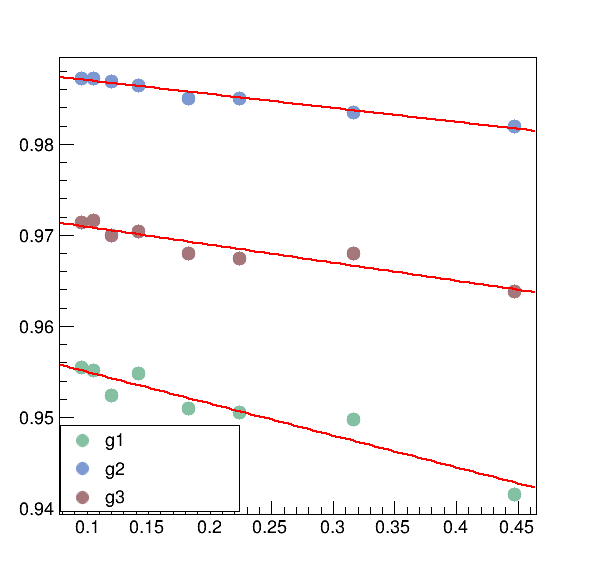

In [12]:
mg.Add(g1);
mg.Add(g2);
mg.Add(g3);

leg = ROOT.TLegend()
leg.SetTextFont(42)
leg.SetTextSize(0.035)
leg.AddEntry(g1,"g1","p")
leg.AddEntry(g2,"g2","p")
leg.AddEntry(g3,"g3","p")
mg.Draw("AP");
leg.Draw()

c1.Update();
c1.Draw();

##  (2) Python echo-system method: Scipy and Matplotlib

In [33]:
from scipy.optimize import curve_fit
from scipy import stats

In [14]:
def func(x, a, b):
    return a*x + b

In [15]:
param1, var1 = curve_fit(func, x, y)
param2, var2 = curve_fit(func, x, a)
param3, var3 = curve_fit(func, x, b)

In [16]:
import matplotlib.pyplot as plt

In [31]:
print("gr1 : a= {0}, b={1}".format(param1[0],param1[1]))
print("gr2 : a= {0}, b={1}".format(param2[0],param2[1]))
print("gr3 : a= {0}, b={1}".format(param3[0],param3[1]))

gr1 : a= -0.03497453570841829, b=0.9584686200264966
gr2 : a= -0.01529181155483635, b=0.9885247452664675
gr3 : a= -0.019747568230965896, b=0.9728681183804248


In [38]:
print("Chi squre: {0} Ndof: {1}".format(stats.chisquare(f_obs=y, f_exp=param1[1]),len(y) - 2))
print("Chi squre: {0} Ndof: {1}".format(stats.chisquare(f_obs=a, f_exp=param2[1]),len(a) - 2))
print("Chi squre: {0} Ndor: {1}".format(stats.chisquare(f_obs=b, f_exp=param2[1]),len(b) - 2))

Chi squre: Power_divergenceResult(statistic=0.000573073510304453, pvalue=0.9999999999999658) Ndof: 6
Chi squre: Power_divergenceResult(statistic=0.00010442589348101985, pvalue=0.9999999999999999) Ndof: 6
Chi squre: Power_divergenceResult(statistic=0.003182777512245224, pvalue=0.999999999986195) Ndor: 6


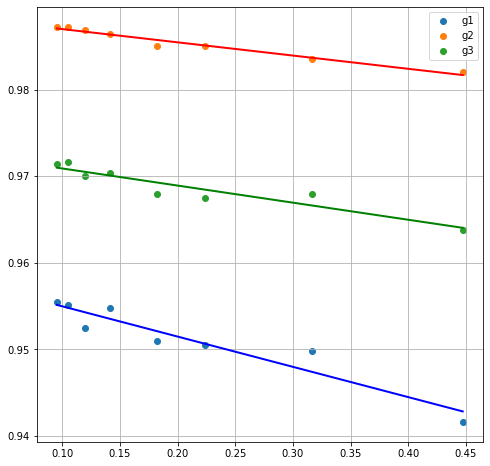

In [25]:
plt.rcParams["figure.figsize"] = (8,8)

plt.scatter(x,y,label='g1')
plt.scatter(x,a,label='g2')
plt.scatter(x,b,label='g3')

plt.plot(x, func(x, *param1), color='b', linewidth=2)
plt.plot(x, func(x, *param2), color='r', linewidth=2)
plt.plot(x, func(x, *param3), color='g', linewidth=2)
plt.grid()
plt.legend()
plt.show()